<a href="https://colab.research.google.com/github/tcqnmi/AccesoDatos.2P/blob/master/RN_Circles1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix

#Creación del conjunto de datos sintéticas
x, y = make_circles(n_samples=1000, noise=0.1, random_state=24)

#División del conjunto de datos en entrenmaiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=24)

#Normalización de los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Creación de la red neuronal (con Keras)


In [ ]:
model = Sequential()

# Capa oculta 4 neuronas / capa de entrada 2 neuronas

model.add(Dense(4, input_dim=2, activation='relu'))

#Capa de salida > (1 neurona/ función de activación: sigmoid)
model.add(Dense(1, activation='sigmoid' ))


model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=25, batch_size=32, verbose=1)

#Predicciones del conjunto de prueba
# astype(int) convierte los valores booleanos a enteros
y_pred = (model.predict(x_test)>0.5).astype(int)

# Medición de la bondad del ajuste
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: ", accuracy)

Epoch 1/25
31/31 [==============================] - 1s 2ms/step - loss: 0.7470 - accuracy: 0.4826
Epoch 2/25
31/31 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.4826
Epoch 3/25
31/31 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4734
Epoch 4/25
31/31 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5133
Epoch 5/25
31/31 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5605
Epoch 6/25
31/31 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5605
Epoch 7/25
31/31 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5963
Epoch 8/25
31/31 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5902
Epoch 9/25
31/31 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6014
Epoch 10/25
31/31 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5738
Epoch 11/25
31/31 [

1/1 [==============================] - 0s 52ms/step
Precisión:  0.5416666666666666


6092/6092 [==============================] - 9s 1ms/step


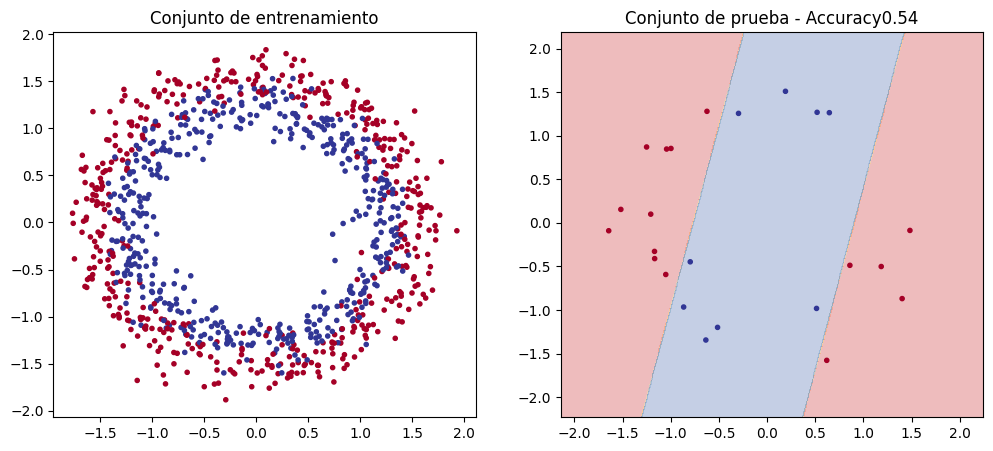

In [24]:
#Representacióin figura

plt.figure(figsize=(12,5))

#Creación deuna mall de predicciones
x_min, x_max = x[:,0].min() -1, x[:,0].max()+1
y_min, y_max = x[:,1].min() -1, x[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh_datos = np.c_[xx.ravel(), yy.ravel()]

#Realizar las predicciones en la malla
mesh_pred = (model.predict(mesh_datos)>0.5).astype(int)

#Conjunto de entrenamiento
plt.subplot(1,2,1)
plt.scatter(x_train[:,0],x_train[:,1], c=y_train, cmap=plt.cm.RdYlBu, marker='.')
plt.title('Conjunto de entrenamiento')

#Conjunto de prueba con predicciones
plt.subplot(1,2,2)
plt.contourf(xx, yy, mesh_pred.reshape(xx.shape), cmap=plt.cm.RdYlBu, alpha=0.3)
plt.scatter(x_test[:,0],x_test[:,1], c=y_pred, cmap=plt.cm.RdYlBu, marker='.')
plt.title(f'Conjunto de prueba - Accuracy{accuracy:.2f}')
plt.show()
